In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import metrics
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [3]:
# Loading dataset
orders = pd.read_csv("Brazilian E-Commerce Public Dataset by Olist.csv")

# Data Cleaning

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     113390 non-null  int64  
 1   order_id                       113390 non-null  object 
 2   order_item_id                  113390 non-null  int64  
 3   customer_id                    113390 non-null  object 
 4   customer_unique_id             113390 non-null  object 
 5   customer_zip_code_prefix       113390 non-null  int64  
 6   customer_city                  113390 non-null  object 
 7   customer_state                 113390 non-null  object 
 8   product_id                     113390 non-null  object 
 9   product_category_name          113390 non-null  object 
 10  product_name_lenght            113390 non-null  float64
 11  product_description_lenght     113390 non-null  float64
 12  product_photos_qty            

We have more than 100k sales records and 40 columns. 

For the purpose of this project,we will only try to boost sales of one product from a top selling category which we will frind from EDA in future steps.

Let's view and analyze the data on the statistical level:

In [5]:
orders.head(5)

,Unnamed: 0,order_id,order_item_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,order_status,order_unique_id
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,Wednesday,September,2017,September-2017,delivered,00010242fe8c5a6d1ba2dd792cb16214-1
1,1,130898c0987d1801452a8ed92a670612,1,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,Wednesday,June,2017,June-2017,delivered,130898c0987d1801452a8ed92a670612-1
2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,Friday,May,2018,May-2018,delivered,532ed5e14e24ae1f0d735b91524b98b9-1
3,3,6f8c31653edb8c83e1a739408b5ff750,1,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,Tuesday,August,2017,August-2017,delivered,6f8c31653edb8c83e1a739408b5ff750-1
4,4,7d19f4ef4d04461989632411b7e588b9,1,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,Thursday,August,2017,August-2017,delivered,7d19f4ef4d04461989632411b7e588b9-1


In [6]:
orders.isna().sum()

Unnamed: 0                       0
order_id                         0
order_item_id                    0
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_id                        0
seller_city                      0
seller_state                     0
seller_zip_code_prefix           0
payment_type                     0
payment_sequential               0
payment_installments             0
price                            0
freight_value                    0
payment_value                    0
shipping_limit_date              0
order_purchase_times

In [8]:
orders.rename(columns={'product_category_name_english':'category'},inplace=True)

In [9]:
orders.isna().sum()

Unnamed: 0                       0
order_id                         0
order_item_id                    0
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_id                        0
seller_city                      0
seller_state                     0
seller_zip_code_prefix           0
payment_type                     0
payment_sequential               0
payment_installments             0
price                            0
freight_value                    0
payment_value                    0
shipping_limit_date              0
order_purchase_times

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     113390 non-null  int64  
 1   order_id                       113390 non-null  object 
 2   order_item_id                  113390 non-null  int64  
 3   customer_id                    113390 non-null  object 
 4   customer_unique_id             113390 non-null  object 
 5   customer_zip_code_prefix       113390 non-null  int64  
 6   customer_city                  113390 non-null  object 
 7   customer_state                 113390 non-null  object 
 8   product_id                     113390 non-null  object 
 9   product_category_name          113390 non-null  object 
 10  product_name_lenght            113390 non-null  float64
 11  product_description_lenght     113390 non-null  float64
 12  product_photos_qty            

In [11]:
orders.duplicated().sum()

np.int64(0)

# Data Pre-processing

In [12]:
orders['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [13]:
orders['order_status'].value_counts()

order_status
delivered    113383
canceled          7
Name: count, dtype: int64

In [14]:
orders = orders[(orders.order_status == 'delivered')]

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113383 entries, 0 to 113389
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     113383 non-null  int64  
 1   order_id                       113383 non-null  object 
 2   order_item_id                  113383 non-null  int64  
 3   customer_id                    113383 non-null  object 
 4   customer_unique_id             113383 non-null  object 
 5   customer_zip_code_prefix       113383 non-null  int64  
 6   customer_city                  113383 non-null  object 
 7   customer_state                 113383 non-null  object 
 8   product_id                     113383 non-null  object 
 9   product_category_name          113383 non-null  object 
 10  product_name_lenght            113383 non-null  float64
 11  product_description_lenght     113383 non-null  float64
 12  product_photos_qty             1133

In [16]:
# Changing timestamp type from object to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.date
orders['order_purchase_timestamp'] =  pd.to_datetime(orders['order_purchase_timestamp'])


In [17]:
orders['year'] = orders.order_purchase_timestamp.apply(lambda x: x.year)
orders['month'] = orders.order_purchase_timestamp.apply(lambda x: x.month)
orders['year_month'] = orders['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders['order_count']=1

# Feature Selection

In [18]:
orders.columns.size

43

In [19]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'customer_id',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_id', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_id', 'seller_city',
       'seller_state', 'seller_zip_code_prefix', 'payment_type',
       'payment_sequential', 'payment_installments', 'price', 'freight_value',
       'payment_value', 'shipping_limit_date', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'day_of_purchase', 'month_of_purchase', 'year_of_purchase',
       'month/year_of_purchase', 'order_status', 'order_unique_id', 'year',
       'month', 'year_month', 'order_count'],
      dtype='object')

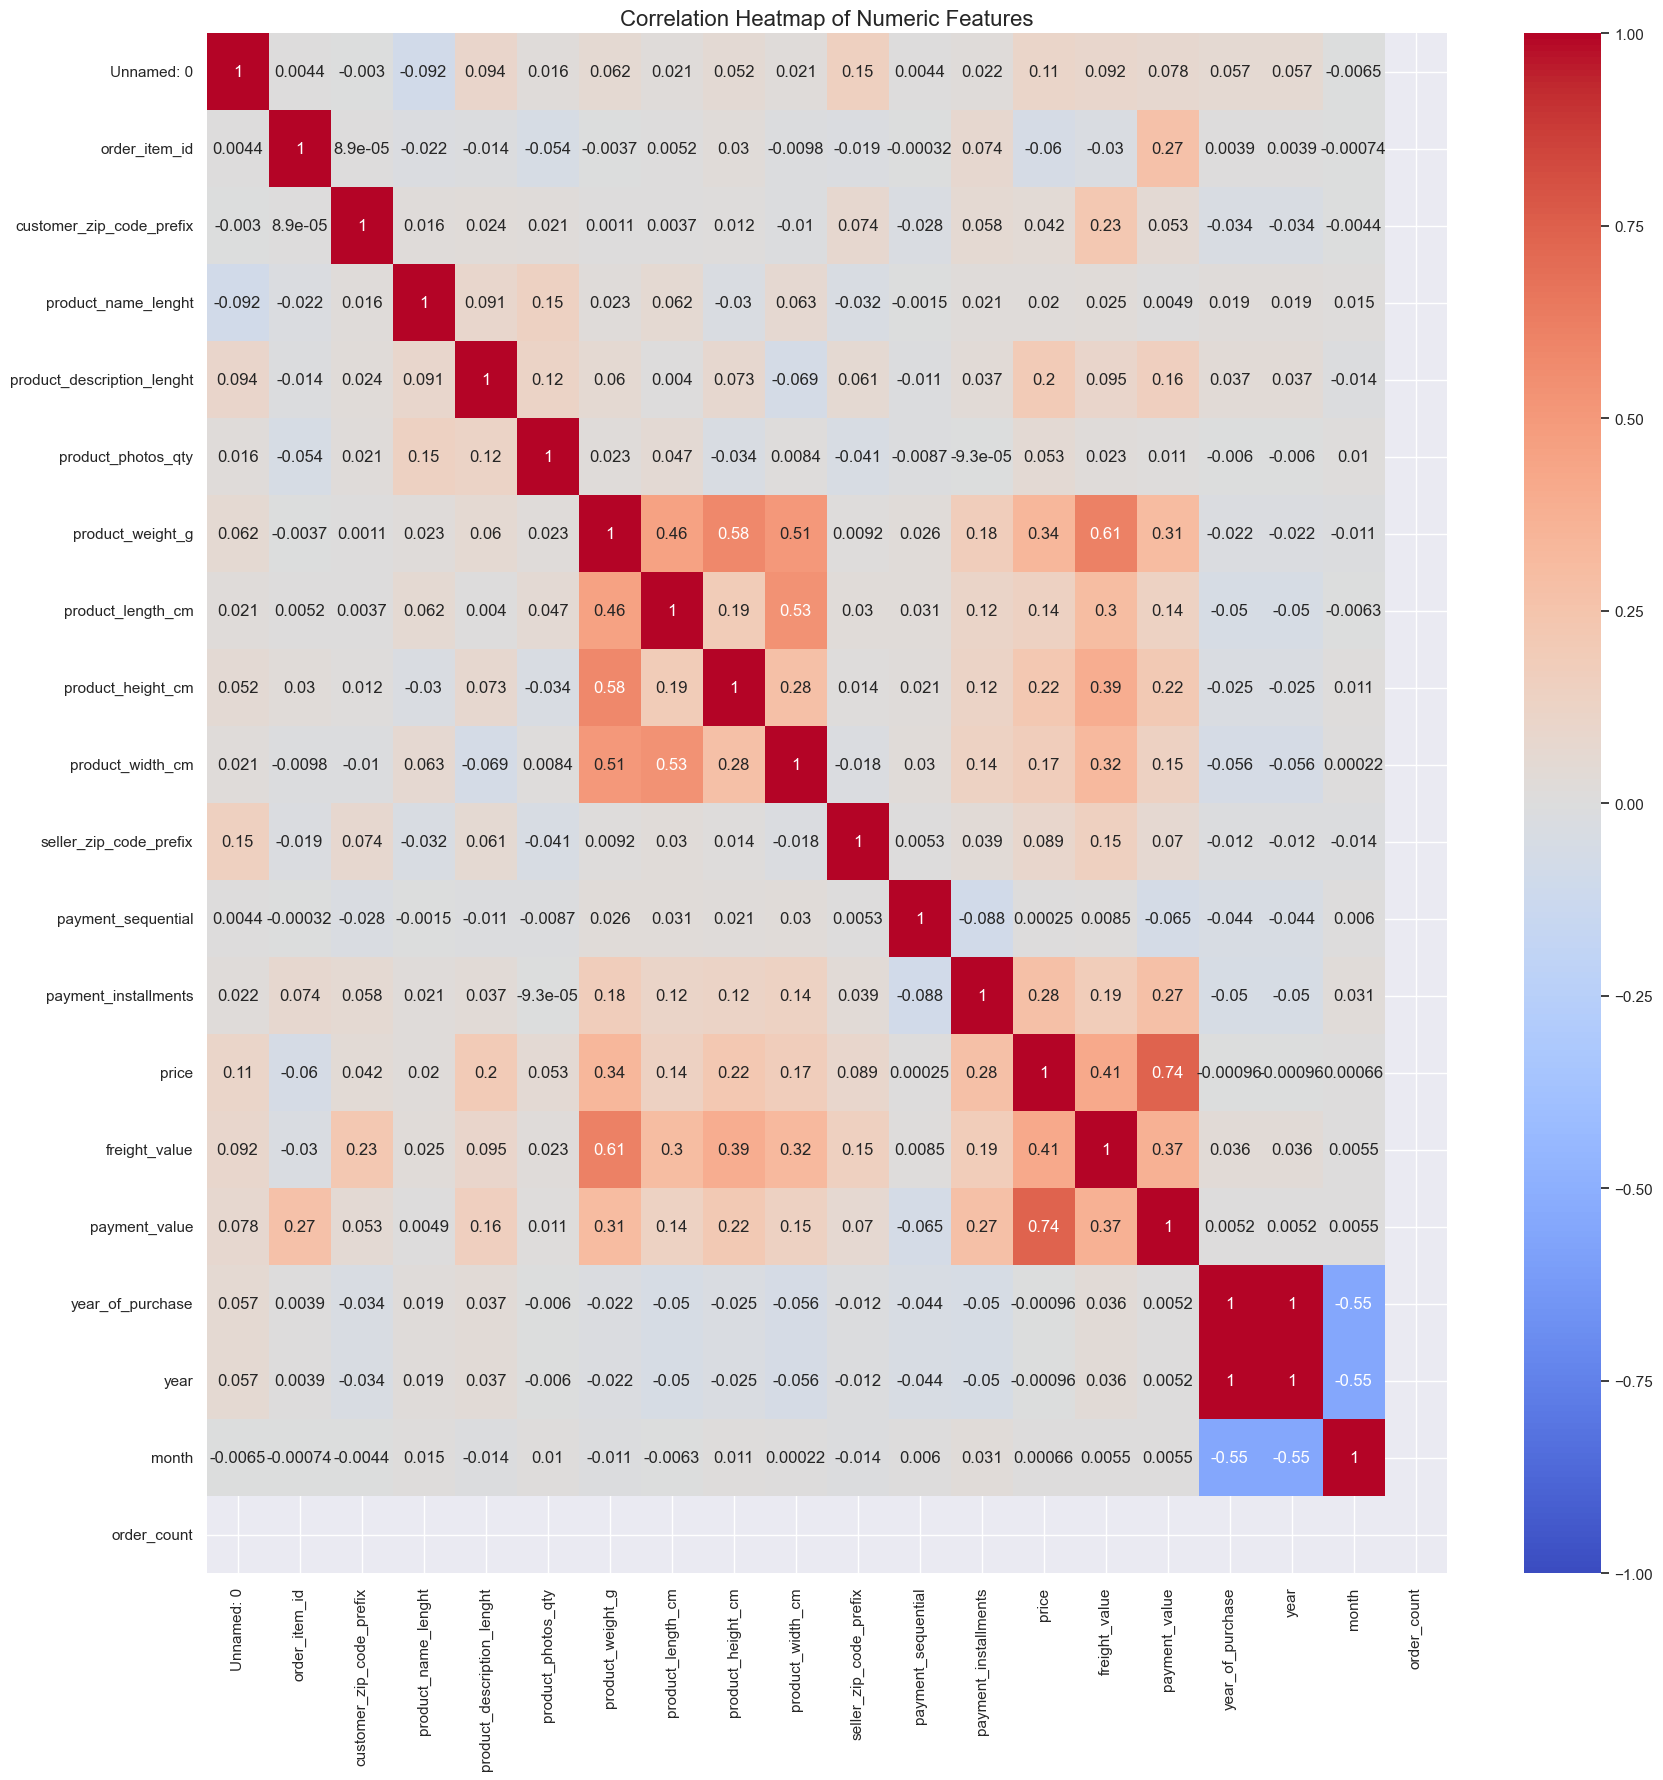

In [21]:
numeric_orders = orders.select_dtypes(include=['number'])

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_orders.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113383 entries, 0 to 113389
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     113383 non-null  int64         
 1   order_id                       113383 non-null  object        
 2   order_item_id                  113383 non-null  int64         
 3   customer_id                    113383 non-null  object        
 4   customer_unique_id             113383 non-null  object        
 5   customer_zip_code_prefix       113383 non-null  int64         
 6   customer_city                  113383 non-null  object        
 7   customer_state                 113383 non-null  object        
 8   product_id                     113383 non-null  object        
 9   product_category_name          113383 non-null  object        
 10  product_name_lenght            113383 non-null  float64       
 11  produ

In [26]:
orders_pca = orders.drop(columns=['order_id','customer_id','order_item_id','seller_id','customer_unique_id','product_id','order_status','year_month'],axis=1)
orders_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113383 entries, 0 to 113389
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     113383 non-null  int64         
 1   customer_zip_code_prefix       113383 non-null  int64         
 2   customer_city                  113383 non-null  object        
 3   customer_state                 113383 non-null  object        
 4   product_category_name          113383 non-null  object        
 5   product_name_lenght            113383 non-null  float64       
 6   product_description_lenght     113383 non-null  float64       
 7   product_photos_qty             113383 non-null  float64       
 8   product_weight_g               113383 non-null  float64       
 9   product_length_cm              113383 non-null  float64       
 10  product_height_cm              113383 non-null  float64       
 11  produ

Applying Label Encoding to Categorical attributes

In [31]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
orders_pca['customer_city']= label_encoder.fit_transform(orders_pca['customer_city'])
orders_pca['customer_state']= label_encoder.fit_transform(orders_pca['customer_state'])
orders_pca['seller_city']= label_encoder.fit_transform(orders_pca['seller_city'])
orders_pca['seller_state']= label_encoder.fit_transform(orders_pca['seller_state'])
orders_pca['payment_type']= label_encoder.fit_transform(orders_pca['payment_type'])
orders_pca['product_category_name'] = label_encoder.fit_transform(orders_pca['product_category_name'])
orders_pca

,Unnamed: 0,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,...,order_delivered_customer_date,order_estimated_delivery_date,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,order_unique_id,year,month,order_count
0,0,28013,731,18,26,58.0,598.0,4.0,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29 00:00:00,Wednesday,September,2017,September-2017,00010242fe8c5a6d1ba2dd792cb16214-1,2017,9,1
1,1,75800,1930,8,26,58.0,598.0,4.0,650.0,28.0,...,2017-07-13 20:39:29,2017-07-26 00:00:00,Wednesday,June,2017,June-2017,130898c0987d1801452a8ed92a670612-1,2017,6,1
2,2,30720,448,10,26,58.0,598.0,4.0,650.0,28.0,...,2018-06-04 18:34:26,2018-06-07 00:00:00,Friday,May,2018,May-2018,532ed5e14e24ae1f0d735b91524b98b9-1,2018,5,1
3,3,83070,3514,17,26,58.0,598.0,4.0,650.0,28.0,...,2017-08-09 21:26:33,2017-08-25 00:00:00,Tuesday,August,2017,August-2017,6f8c31653edb8c83e1a739408b5ff750-1,2017,8,1
4,4,36400,1026,10,26,58.0,598.0,4.0,650.0,28.0,...,2017-08-24 20:04:21,2017-09-01 00:00:00,Thursday,August,2017,August-2017,7d19f4ef4d04461989632411b7e588b9-1,2017,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113385,113385,22793,3118,18,54,44.0,533.0,2.0,1000.0,69.0,...,2017-05-24 10:52:43,2017-05-22 00:00:00,Wednesday,April,2017,April-2017,fdaf98feac227eb978d8f33f36e0231d-1,2017,4,1
113386,113386,13485,2076,25,30,32.0,1306.0,3.0,500.0,17.0,...,2017-08-17 17:47:55,2017-09-04 00:00:00,Friday,August,2017,August-2017,fe68b52db13993f58175fa589125d345-1,2017,8,1
113387,113387,29066,4041,7,61,50.0,1935.0,4.0,5660.0,54.0,...,2018-08-15 14:57:50,2018-08-10 00:00:00,Wednesday,July,2018,July-2018,fefacc66af859508bf1a7934eab1e97f-1,2018,7,1
113388,113388,12280,609,25,10,28.0,242.0,1.0,2000.0,19.0,...,2018-04-20 17:48:39,2018-04-30 00:00:00,Thursday,April,2018,April-2018,ff701a7c869ad21de22a6994237c8a00-1,2018,4,1


### Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

# Keep only numeric columns for scaling
numeric_df = orders_pca.select_dtypes(include=['number'])

# Initialize and fit the scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


([<matplotlib.axis.XTick at 0x22301926f50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

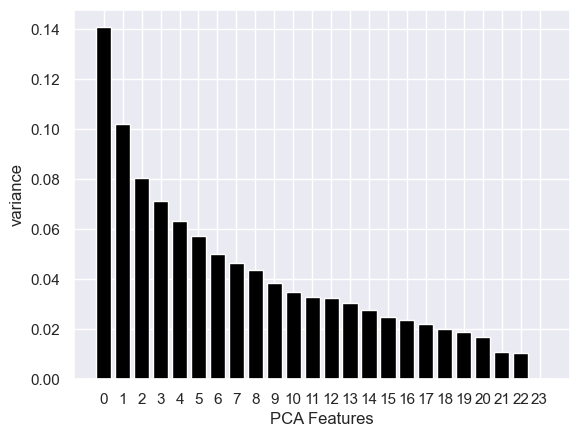

In [34]:
pca = PCA(n_components=24) 
principalComponents = pca.fit_transform(scaled_data)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = "black")
plt.xlabel("PCA Features")
plt.ylabel("variance")
plt.xticks(features)

In [35]:
print(f'scaled transformed:\n{principalComponents}')

scaled transformed:
[[-1.27574424e+00 -1.91784292e+00  5.66390350e-01 ...  1.90372408e-01
   1.35960475e-02  3.34998452e-16]
 [-1.04625842e+00 -1.49406255e+00 -1.39160786e-01 ...  2.93675195e-01
   1.26574504e-01  1.18836378e-16]
 [-1.19726877e+00  1.09613546e+00  2.29591048e-01 ...  1.97310405e-01
   3.59476086e-02  3.37890076e-16]
 ...
 [ 2.82226006e+01  5.01437171e+00 -4.32779824e+00 ... -3.34288918e+00
   8.13869096e+00  1.85127319e-15]
 [-7.92204680e-01  1.47845630e+00  8.00037561e-01 ... -3.75976335e-01
  -8.15223641e-02 -1.41245724e-16]
 [-7.92202118e-01  1.47845828e+00  8.00032817e-01 ... -3.75976524e-01
  -8.15228053e-02 -1.41245724e-16]]


In [36]:
print(f'Eigenvalues: \n{pca.explained_variance_}')

Eigenvalues: 
[3.37725002e+00 2.44898966e+00 1.93301407e+00 1.71013662e+00
 1.51846735e+00 1.37065300e+00 1.20537035e+00 1.11059483e+00
 1.05052820e+00 9.23482516e-01 8.33188663e-01 7.90597737e-01
 7.79638999e-01 7.28738135e-01 6.67898757e-01 5.94550187e-01
 5.72035134e-01 5.33741862e-01 4.82286480e-01 4.56355808e-01
 4.01600519e-01 2.59566332e-01 2.51526444e-01 2.10276054e-16]


In [37]:
print(f'Eigenvectors: \n{pca.components_}')

Eigenvectors: 
[[ 8.38419325e-02  8.95758050e-02 -5.14587654e-02 -8.46724000e-02
  -6.16785867e-03  2.40463801e-02  9.71558868e-02  2.07169439e-02
   4.29163037e-01  2.91090065e-01  3.16921018e-01  3.12255867e-01
  -1.01661745e-01 -9.88081653e-02  1.06275135e-01  3.64923556e-03
   1.82454759e-04  2.09503861e-01  3.59396927e-01  4.15795555e-01
   3.41047474e-01 -4.26300670e-02 -4.26300670e-02  2.21281433e-02
   0.00000000e+00]
 [ 6.50132011e-02 -2.21861651e-02  6.05794216e-03  2.58161803e-02
  -8.64400741e-04  1.00940365e-02  5.94401934e-02  2.96382518e-04
   2.31179637e-02 -1.98495648e-02  1.06305916e-02 -2.53225201e-02
   2.43975593e-03  3.94650379e-03  1.13932167e-02 -1.67144615e-02
  -4.39016561e-02 -2.34097596e-02  5.17738214e-02  5.78687822e-02
   5.26658396e-02  6.14645815e-01  6.14645815e-01 -4.71138291e-01
   0.00000000e+00]
 [-1.55287193e-01 -2.79179869e-01  2.01329135e-01  2.67733042e-01
  -3.30852834e-03  8.42515871e-02 -1.11349066e-01  6.63002079e-02
   1.99492587e-01  2.08

We plotted variance graph for all 24 features.
Now, we take some number of components and plot graph of its variance percentage.

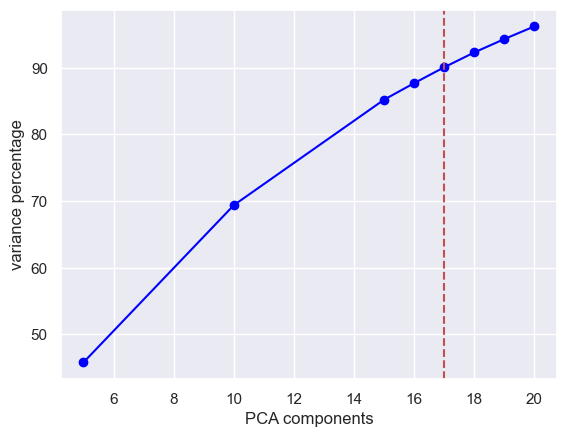

In [39]:
components =[5,10,15,16,17,18,19,20]
variance_percent=[]
for i in components:
  pca= PCA(i)
  PrincipalComponents_ = pca.fit_transform(scaled_data)
  var_ratio = pca.explained_variance_ratio_
  variance_percent.append(sum(var_ratio)*100)

plt.plot(components,variance_percent,color='blue', marker='o')
plt.axvline(17, color='r', linestyle='dashed')
plt.xlabel("PCA components")
plt.ylabel("variance percentage")
plt.show()
# df_pc = pd.DataFrame(PrincipalComponents_,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16"])

We see, when number of components is 16, variance percentage is 91. Hence, we can reduce number of features to 16



In [40]:
pca= PCA(17)
PrincipalComponents_ = pca.fit_transform(scaled_data)
df_pc = pd.DataFrame(PrincipalComponents_,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16","PCA17"])
df_pc.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-1.275744,-1.917843,0.566390,1.514495,-0.027923,0.263494,1.126804,0.103780,-0.625441,-0.422888,-0.421700,-0.701596,-0.499909,-1.312429,0.965332,-0.396003,0.181868
1,-1.046258,-1.494063,-0.139161,2.729455,-0.331160,-0.713326,1.188248,0.260356,-0.257526,-0.716575,-1.145230,0.267183,0.829276,-0.909972,0.608333,0.775211,-0.461379
2,-1.197269,1.096135,0.229591,2.188320,-0.684654,0.319626,1.039692,0.074701,-0.759132,-0.407682,-0.458159,-0.515189,-0.181213,-1.313433,0.807070,-0.934524,-0.054539
3,-1.070009,-1.799343,0.467877,1.611069,0.049292,0.300194,1.066811,0.207705,-0.798400,-0.373436,-0.419870,0.677375,1.452140,-0.942529,0.678412,1.051244,0.696878
4,-1.023416,-1.822404,0.223302,2.107239,-0.251203,0.366325,0.989061,-0.045364,-0.955034,-0.185220,-0.047765,-0.408133,0.210348,-1.171622,0.840498,-0.392887,-0.382380


In [41]:
var_ratio = pca.explained_variance_ratio_
print(f'total variance for 17 components:{sum(var_ratio)*100}')

total variance for 17 components:90.06226496256575


# Exploratory Data Analysis

How many categories does the data have?

In [43]:
# Unique categories
categories = orders['product_category_name'].unique()
len(categories)

73

**Observations:** There are 71 unique categories

In [44]:
categories

array(['cool_stuff', 'brinquedos', 'tablets_impressao_imagem', 'pet_shop',
       'moveis_decoracao', 'cama_mesa_banho', 'perfumaria',
       'informatica_acessorios', 'utilidades_domesticas', 'papelaria',
       'ferramentas_jardim', 'esporte_lazer', 'telefonia', 'audio',
       'beleza_saude', 'construcao_ferramentas_jardim',
       'relogios_presentes', 'bebes', 'livros_tecnicos', 'dvds_blu_ray',
       'consoles_games', 'alimentos', 'fashion_bolsas_e_acessorios',
       'casa_conforto', 'moveis_sala', 'casa_conforto_2',
       'instrumentos_musicais', 'automotivo', 'moveis_escritorio',
       'casa_construcao', 'construcao_ferramentas_iluminacao',
       'eletronicos', 'sinalizacao_e_seguranca', 'cine_foto',
       'construcao_ferramentas_construcao', 'telefonia_fixa',
       'fraldas_higiene', 'pc_gamer', 'fashion_roupa_masculina',
       'eletroportateis', 'industria_comercio_e_negocios',
       'construcao_ferramentas_seguranca', 'fashion_esporte',
       'malas_acessorios', 'ma

### How is the trend of sales with passing months?

In [46]:
orderSales = (
    orders.groupby(['year', 'month', 'year_month'], as_index=False)
    .sum(numeric_only=True)
    .loc[:, ['year', 'month', 'year_month', 'price', 'order_count']]
)
orderSales
# From the results we can see gradually the order_counts increase with passing months

,year,month,year_month,price,order_count
0,2016,10,2016-10,41613.89,328
1,2016,12,2016-12,10.90,1
2,2017,1,2017-01,116499.95,948
3,2017,2,2017-02,235824.38,1893
4,2017,3,2017-03,374319.44,3014
5,2017,4,2017-04,351623.76,2631
6,2017,5,2017-05,517071.04,4162
7,2017,6,2017-06,436915.78,3628
8,2017,7,2017-07,511603.82,4655
9,2017,8,2017-08,574149.64,4974


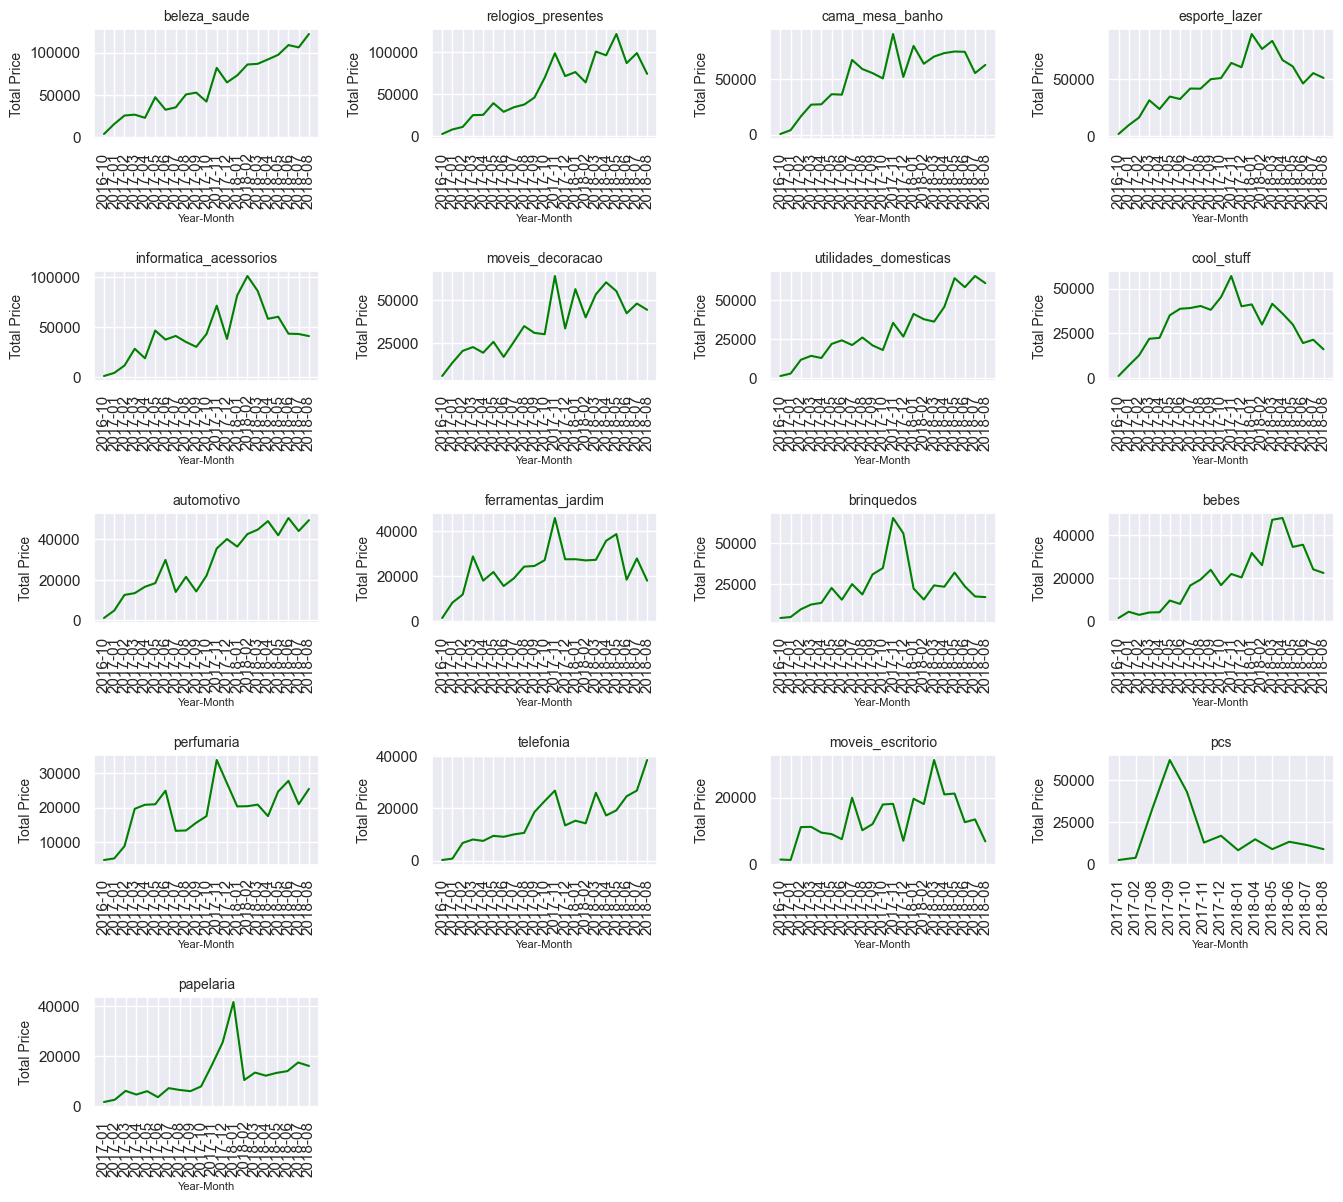

In [49]:
# Compute top categories
top_cat = (
    orders.groupby(['product_category_name'])
    .sum(numeric_only=True)
    .sort_values("price", ascending=False)
    .reset_index()
)

top_category = top_cat['product_category_name'].head(17).to_list()

# Aggregate price by category and month
category_graph = (
    orders.groupby(['product_category_name', 'year_month'])['price']
    .sum()
    .reset_index()
)

# Create subplots
fig = plt.figure(figsize=(16, 14))
fig.subplots_adjust(hspace=1.2, wspace=0.5)

for i, cat in enumerate(top_category):
    ax = plt.subplot(5, 4, i + 1)
    data = category_graph[category_graph['product_category_name'] == cat]

    sns.lineplot(x='year_month', y='price', data=data, ax=ax, color='green')
    ax.set_title(cat, fontsize=10)
    ax.set_xlabel('Year-Month', fontsize=8)
    ax.set_ylabel('Total Price', fontsize=10)
    ax.tick_params(axis='x', rotation=90)

plt.show()


## Which categories generated most revenues in the year 2018?

A good way to find top selling products is analyzing latest year's available data to determine which categories are responsible and contributing to most of the revenues of the company.

In [50]:
orders_2018 = orders.loc[orders['year']==2018]

There are 61680 records in 2018

In [51]:
revenue_2018 = orders_2018.groupby(["product_category_name"]).agg({'price':'sum'}).rename(columns={'price':'revenue'}).reset_index()
revenue_2018 = revenue_2018.sort_values(by=['revenue'], ascending=False)
revenue_2018.head()

,product_category_name,revenue
11,beleza_saude,771782.07
66,relogios_presentes,716178.68
13,cama_mesa_banho,555432.11
32,esporte_lazer,530165.38
44,informatica_acessorios,514194.04


In [52]:
category = revenue_2018['product_category_name'].to_list()
revenue = revenue_2018['revenue'].to_list()

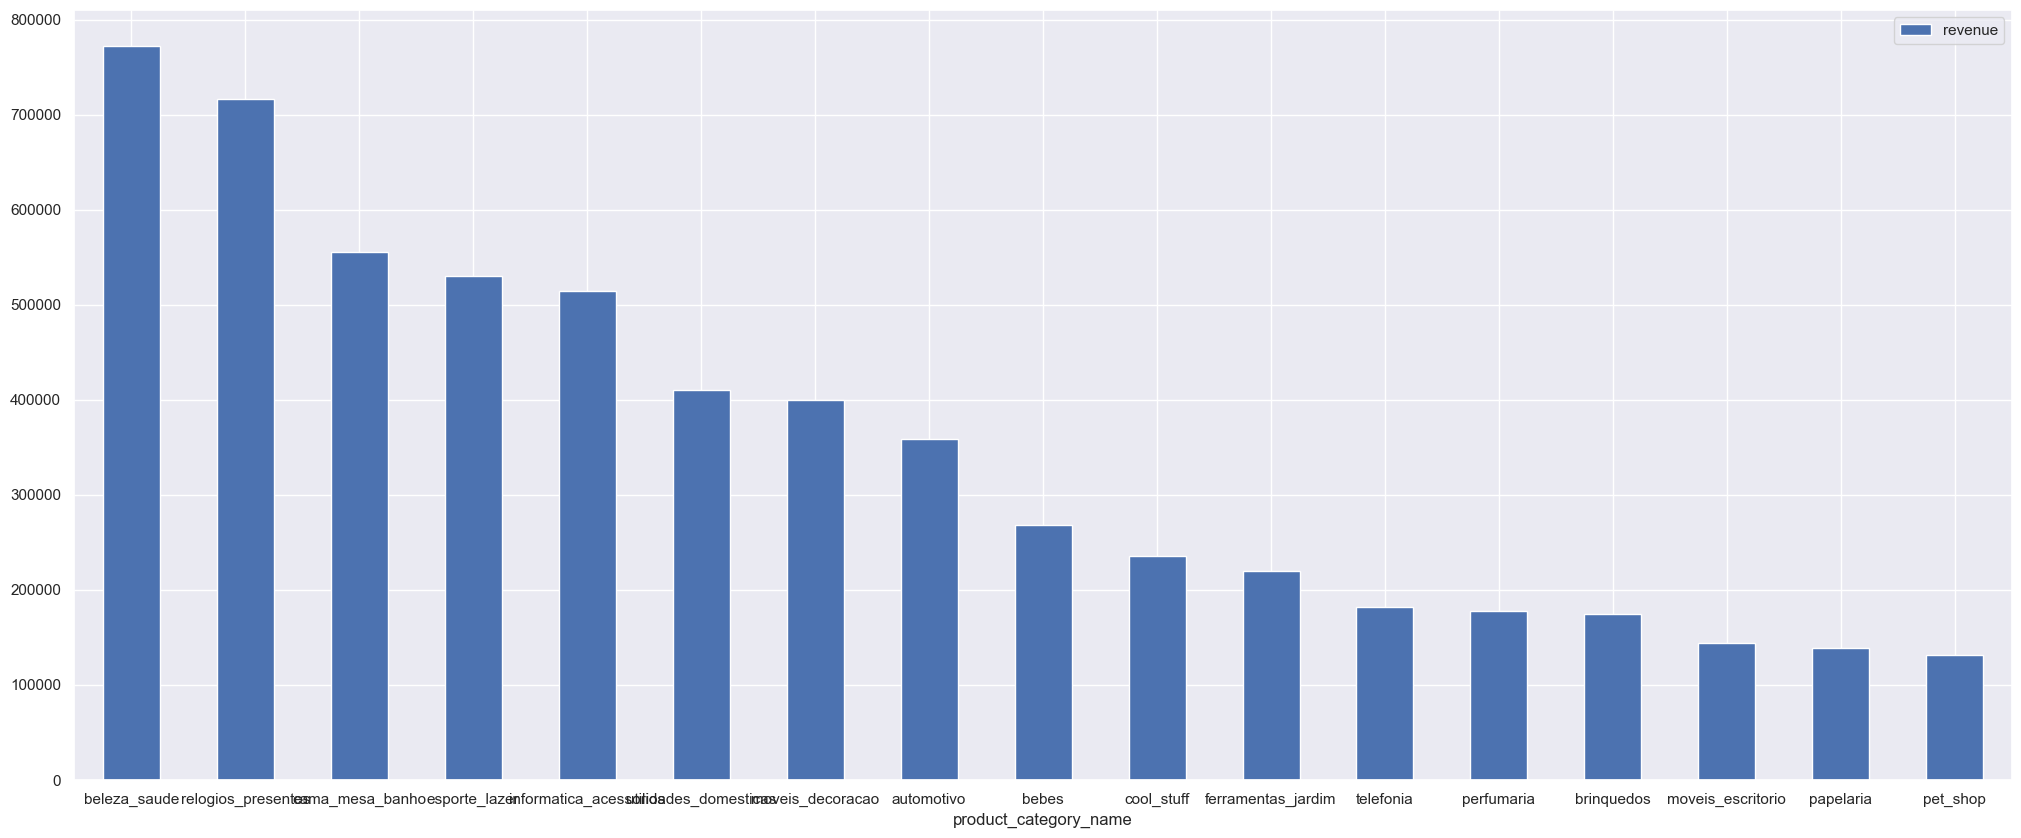

In [54]:
ax= revenue_2018.iloc[:17,:].plot.bar('product_category_name','revenue',rot=0,figsize=(25,10))

**Observations:**  health_beaty department has generated a revenue of $768757.83 in the year 2018 and is the top selling category among the entire olist store.

In [55]:
revenue_2018['revenue'].sum()

np.float64(7426470.02)

Total revenue generated by olist store in 2018: $ 7389947.52

### How much do the top 17 categories contribute to the total revenue?

In [56]:
revenue_2018['revenue'].head(17).sum() #Total revenue generated by top 17 categories

np.float64(5927117.3)

In [57]:
revenue_2018['revenue'].head(20)

11    771782.07
66    716178.68
13    555432.11
32    530165.38
44    514194.04
71    410604.64
54    399339.72
8     358888.64
9     268349.90
26    235433.76
40    219576.06
69    181540.95
62    177583.85
12    174779.86
55    143782.66
59    138484.11
63    131000.87
21    125106.09
45    111191.85
30    102030.39
Name: revenue, dtype: float64

# Is there any effect on the sales based on particular days?

In [59]:
successful_orders_sales = (
    orders.groupby(['year', 'month', 'year_month'], as_index=False)[['price', 'order_count']]
    .sum()
)


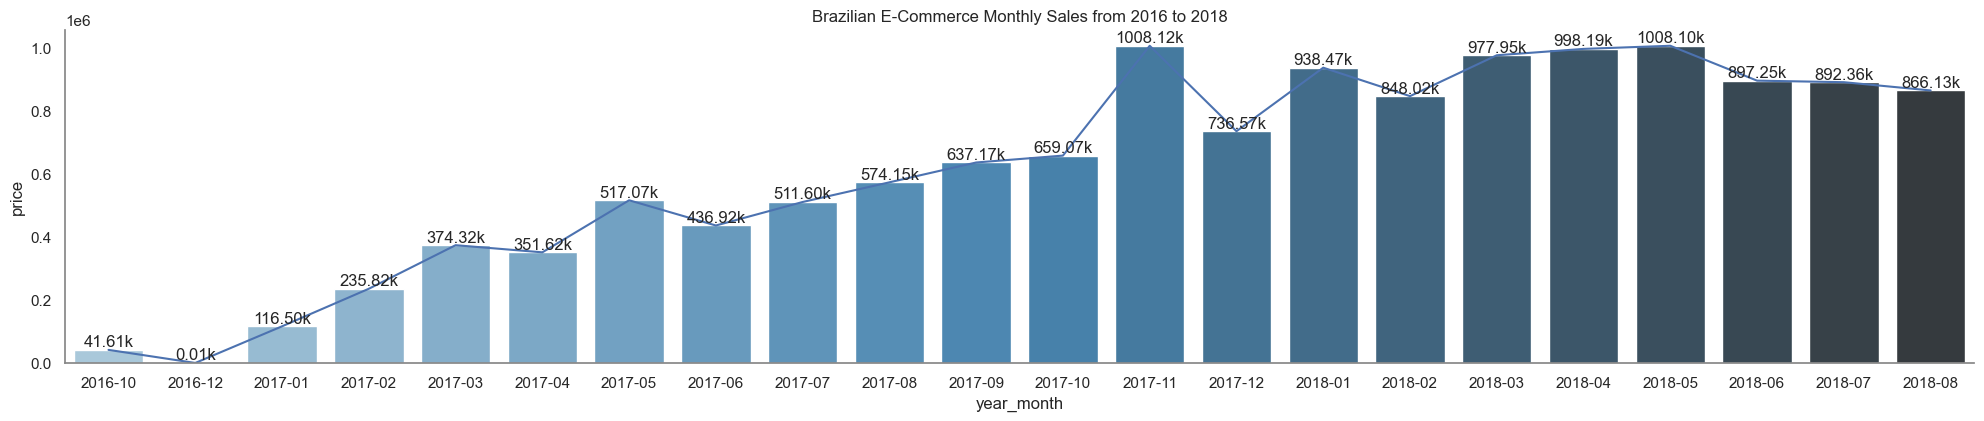

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#888888')
    ax.spines['left'].set_color('#888888')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

fig, ax = plt.subplots(figsize=(20, 4.5))
ax = sns.lineplot(x='year_month', y='price', data=successful_orders_sales)
bar_plot(x='year_month', y='price', df=successful_orders_sales, value=True)
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Monthly Sales from 2016 to 2018');

# Considering pet_shop category which generated the most sales in 2018

In [68]:
orders['product_category_name'].unique()


array(['cool_stuff', 'brinquedos', 'tablets_impressao_imagem', 'pet_shop',
       'moveis_decoracao', 'cama_mesa_banho', 'perfumaria',
       'informatica_acessorios', 'utilidades_domesticas', 'papelaria',
       'ferramentas_jardim', 'esporte_lazer', 'telefonia', 'audio',
       'beleza_saude', 'construcao_ferramentas_jardim',
       'relogios_presentes', 'bebes', 'livros_tecnicos', 'dvds_blu_ray',
       'consoles_games', 'alimentos', 'fashion_bolsas_e_acessorios',
       'casa_conforto', 'moveis_sala', 'casa_conforto_2',
       'instrumentos_musicais', 'automotivo', 'moveis_escritorio',
       'casa_construcao', 'construcao_ferramentas_iluminacao',
       'eletronicos', 'sinalizacao_e_seguranca', 'cine_foto',
       'construcao_ferramentas_construcao', 'telefonia_fixa',
       'fraldas_higiene', 'pc_gamer', 'fashion_roupa_masculina',
       'eletroportateis', 'industria_comercio_e_negocios',
       'construcao_ferramentas_seguranca', 'fashion_esporte',
       'malas_acessorios', 'ma

In [69]:
orders_health_beauty = orders.loc[orders['product_category_name']=='pet_shop']
orders_health_beauty

,Unnamed: 0,order_id,order_item_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,...,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,order_status,order_unique_id,year,month,year_month,order_count
159,159,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,e5f2d52b802189ee658865ca93d83a8f,pet_shop,...,Wednesday,April,2017,April-2017,delivered,00018f77f2f0320c557190d7a144bdd3-1,2017,4,2017-04,1
160,160,023669233121f0fb7899e5be2b22885f,2,22c15b46adce8afdd7d58e6582752263,1501fb94311512e6b98462d159e05a23,3673,sao paulo,SP,4dba4de4cd67ba2191c34468ac2ca841,pet_shop,...,Monday,April,2018,April-2018,delivered,023669233121f0fb7899e5be2b22885f-2,2018,4,2018-04,1
161,161,023669233121f0fb7899e5be2b22885f,1,22c15b46adce8afdd7d58e6582752263,1501fb94311512e6b98462d159e05a23,3673,sao paulo,SP,6b6b162b177d0f36987993aecbe1c65f,pet_shop,...,Monday,April,2018,April-2018,delivered,023669233121f0fb7899e5be2b22885f-1,2018,4,2018-04,1
162,162,023669233121f0fb7899e5be2b22885f,3,22c15b46adce8afdd7d58e6582752263,1501fb94311512e6b98462d159e05a23,3673,sao paulo,SP,784c94d1803e49492d2758907914b26c,pet_shop,...,Monday,April,2018,April-2018,delivered,023669233121f0fb7899e5be2b22885f-3,2018,4,2018-04,1
163,163,0265de29d2bf47d85101018e7f7d4ff6,1,adf1ecaca5e192f1356ed0760e5432ae,3afe3f02d75b3d8d823d14959002987f,65919,imperatriz,MA,10876ffa7227a74d878729d3f6bea35d,pet_shop,...,Sunday,April,2017,April-2017,delivered,0265de29d2bf47d85101018e7f7d4ff6-1,2017,4,2017-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113116,113116,b59dd155566e5ce134bddffdc26e471c,1,7d2af39c5453e92ad7baad03e370f1d7,34134e9af3495ee6b40f73c3b54f196a,85905,toledo,PR,ac00a8b91ef562f9c4216e203f1bd093,pet_shop,...,Wednesday,December,2017,December-2017,delivered,b59dd155566e5ce134bddffdc26e471c-1,2017,12,2017-12,1
113117,113117,d0187cf305e08f85775b03f6de2cff7b,1,595ac4d9648f78c1f8e00308962ad569,dd4473e95ebb4d23ba1058edb301df95,89256,jaragua do sul,SC,24ca97c9bbba92771baa2989300b2c50,pet_shop,...,Wednesday,January,2018,January-2018,delivered,d0187cf305e08f85775b03f6de2cff7b-1,2018,1,2018-01,1
113219,113219,c531cb50fa0506125473379b2d74356b,1,95e27d868269c41e9785c6028f1cc504,98669fd815c7869b4010a695f91ecf68,89251,jaragua do sul,SC,a177ae30ef17394975b58f6d5883a56f,pet_shop,...,Sunday,June,2018,June-2018,delivered,c531cb50fa0506125473379b2d74356b-1,2018,6,2018-06,1
113229,113229,c69e7e591d11462c6a11215e52c4329b,1,1c1e1532dcfb2dba978d8f91fef9484f,c4532df84cda6b061946988390c48f45,14340,brodowski,SP,64367bed3ed96fd9381676fbe33b6443,pet_shop,...,Sunday,June,2018,June-2018,delivered,c69e7e591d11462c6a11215e52c4329b-1,2018,6,2018-06,1


## Most sold out product from health_beauty category

In [70]:
orders_health_beauty.groupby('product_id').size().sort_values(ascending=False) #Most sold product

product_id
e1da6ab77f4859eb17950e5df1c0f815    43
a4aa7c1427c31344e5f7cc3d839fe562    42
ca5c923962558430573f83661dbe36d6    41
e94df75b2e9a8b056be0c144a731f55c    33
6adab229374835b551f6402e0dc53267    32
                                    ..
04b2173a311a1fe1a8c90a59c0a0f474     1
064767e05dd710b14c4bf5f2d50c89b8     1
085860688be9891f26e36a6ebc27cf6d     1
0aa63972ae4967bb6874df796163549d     1
0bde5c9ff4a756aed7fe09a8a3bb0dfd     1
Length: 710, dtype: int64

## Which product from health_beauty has undergone the most price changes in 2018?

In [72]:
# Which product has the most pricing variating in pet shop?

orders_health_beauty = orders.loc[orders['product_category_name']=='pet_shop'].sort_values('product_id',ascending=False)
top_price_variation_product = orders_health_beauty.groupby('product_id').agg({'price':pd.Series.nunique})
top_price_variation_product.sort_values('price',ascending=False)

,price
product_id,
3c3d244942b424b931c33f1ddc122b80,8
a6883f92891e256b926bf8b9c40fbe9f,8
7ac0d3f8ac5b60c13d74b02b8cbb4623,7
e1bf2f209fd2b08e1af3ed71732d9008,6
ba80c9f47a84d1e08465f72e22930c83,6
...,...
ff39fa912acf02a733de1b0cf84e779e,1
ff4c1a248a5110d784de5c67a9106d67,1
ff4c53f24709771879d01232ae305cac,1


**Observations:** The product "3c3d244942b424b931c33f1ddc122b80" has undergone price variation of 31 times so we'll work on it and find which price will be fit for next year

In [73]:
product_1 = orders_health_beauty.loc[orders_health_beauty['product_id']=='3c3d244942b424b931c33f1ddc122b80']

## Calculating revenue of this product in the year 2018

In [74]:
product_1['price'].mean()

np.float64(192.5475)

In [75]:
product_1['price'].count()

np.int64(12)

**Observation:** Last year, this product was sold for an average of $50.03789 and 152 units were sold

In [76]:
revenue_of_product_2018 = product_1.groupby(['year']).agg({'price':"mean",'product_id':"count"})
revenue_of_product_2018 = revenue_of_product_2018.rename(columns={'product_id':'units_sold'})
revenue_of_product_2018

,price,units_sold
year,,
2018,192.5475,12


# Modeling

## Linear

In [79]:
# X = product_1.drop(,axis=1)
X = product_1.iloc[: , 10:]
X = X.drop(['seller_id','price','payment_type','seller_zip_code_prefix','seller_city','seller_state','year_month'],axis=1)
y = product_1['price']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 27237 to 20470
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   product_name_lenght            12 non-null     float64       
 1   product_description_lenght     12 non-null     float64       
 2   product_photos_qty             12 non-null     float64       
 3   product_weight_g               12 non-null     float64       
 4   product_length_cm              12 non-null     float64       
 5   product_height_cm              12 non-null     float64       
 6   product_width_cm               12 non-null     float64       
 7   payment_sequential             12 non-null     int64         
 8   payment_installments           12 non-null     int64         
 9   freight_value                  12 non-null     float64       
 10  payment_value                  12 non-null     float64       
 11  shipping_limit_date

In [80]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (12, 26)
Shape of y is:  (12,)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [82]:
scaler = StandardScaler()

In [84]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
mse=metrics.mean_squared_error(pred, y_test)
print("RMSE: ", (sqrt(mse)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

RMSE:  0.0
R2 score:  1.0


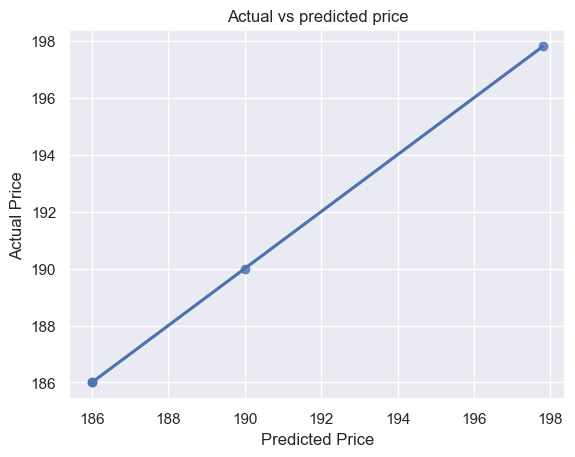

In [87]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

## Ridge

In [90]:
feature_count=8
ridge =Ridge()
alphas =  {'alpha':[0.0001,0.001,0.01,0.1,1, 10]}
ridge_model= GridSearchCV(ridge, alphas, scoring='neg_mean_squared_error',cv=feature_count)

In [91]:
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
error = sqrt(mean_squared_error(y_test, y_pred))
print("Ridge regression mse:{}".format(error))
print("Best alpha value: ",ridge_model.best_params_)
best_ridge_model=ridge_model.best_estimator_


Ridge regression mse:0.00027321601212488726
Best alpha value:  {'alpha': 0.0001}


## Lasso

In [92]:
feature_count=8
lasso =Lasso()
alphas =  {'alpha':[0.00000001,0.0000001, 0.0000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,110]}
lasso_model= GridSearchCV(lasso, alphas, scoring='neg_mean_squared_error',cv=feature_count)
    

In [93]:
lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
error = sqrt(mean_squared_error(y_test, y_pred))
print("Lasso regression mse:{}".format(error))
print("Best alpha value: ",lasso_model.best_params_)
best_lasso_model=lasso_model.best_estimator_

Lasso regression mse:0.0011104297934932095
Best alpha value:  {'alpha': 1e-08}


# Demand curve

In [94]:
product_1

,Unnamed: 0,order_id,order_item_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,...,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,order_status,order_unique_id,year,month,year_month,order_count
27237,27237,a9fa4232de4a87398cfab2a5bcbecc56,1,27e430dc15333a6d9626d282c13c6035,b37db03aaa5f3d4d0b69aa6fe7fc7f5a,76804,porto velho,RO,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Wednesday,April,2018,April-2018,delivered,a9fa4232de4a87398cfab2a5bcbecc56-1,2018,4,2018-04,1
27236,27236,70613a4d0fcc3ad95dd80f90a7d05a59,1,d8dc5b416324594269249da4d51983a6,cbbdb73111a07580278c05841b71e891,18300,capao bonito,SP,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Tuesday,April,2018,April-2018,delivered,70613a4d0fcc3ad95dd80f90a7d05a59-1,2018,4,2018-04,1
27235,27235,6d04d37febb3507a35abc6f37bf14d97,1,786f59bbbfed7665c5ce443f49b79fb0,f11e8efa1972ccd3da94cc9ba36b88ae,8571,itaquaquecetuba,SP,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Monday,April,2018,April-2018,delivered,6d04d37febb3507a35abc6f37bf14d97-1,2018,4,2018-04,1
27234,27234,49e6f4ed0034a19d7c8051244c8d64ba,1,5f4691392be0759eac67f4aeb96950d3,8fc0fc75220896ec20902c2e4a282f83,20030,rio de janeiro,RJ,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Monday,July,2018,July-2018,delivered,49e6f4ed0034a19d7c8051244c8d64ba-1,2018,7,2018-07,1
27238,27238,e9ed35393653f0ebbc1d792ba5ed1447,1,146382aa0321176044958bb471c902a5,58288306e7fc1fbe015d492f3b292385,12220,sao jose dos campos,SP,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Friday,April,2018,April-2018,delivered,e9ed35393653f0ebbc1d792ba5ed1447-1,2018,4,2018-04,1
27239,27239,ef32d0ec67bd0ab2ea40c31c3f44571a,1,956f92f85ef93e5464e0a4e80a51d9ec,5cbb4434b22b272315655de6df0fcd27,15950,santa adelia,SP,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Thursday,April,2018,April-2018,delivered,ef32d0ec67bd0ab2ea40c31c3f44571a-1,2018,4,2018-04,1
27276,27276,a37a7ca4bfc323dd5c2466e609e4ae61,1,3f8aae0419248bd89751324f896ee2c8,968274cc4a0b87221bd3a935f9bd2d3e,70844,brasilia,DF,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Monday,June,2018,June-2018,delivered,a37a7ca4bfc323dd5c2466e609e4ae61-1,2018,6,2018-06,1
20471,20471,9c906865a38a9cbaa3d82e02f19b2d5f,1,18a11e85ef79b85255bd338e204b10e3,d340ab58a3123cfb267c30954eb377b5,3690,sao paulo,SP,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Wednesday,January,2018,January-2018,delivered,9c906865a38a9cbaa3d82e02f19b2d5f-1,2018,1,2018-01,1
27275,27275,715fcad4ccf80801995de682dd4be9c7,1,68997e7efe0a8f5ba065b8b8dfa707c8,3d3fd21b0a48da1146800cdac0a44626,7781,cajamar,SP,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Tuesday,June,2018,June-2018,delivered,715fcad4ccf80801995de682dd4be9c7-1,2018,6,2018-06,1
27274,27274,490580980004a090d98d9d45064db2a1,1,aa54db1f70672e3dd23fe0ce29522fa3,20aeef66847d69afc58e891d0560d8b7,30260,belo horizonte,MG,3c3d244942b424b931c33f1ddc122b80,pet_shop,...,Monday,June,2018,June-2018,delivered,490580980004a090d98d9d45064db2a1-1,2018,6,2018-06,1


In [95]:

product_1_test = product_1.groupby(['price']).agg({'price':"count"}).rename(columns={'price':'quantity'}).reset_index()

product_1_test

,price,quantity
0,186.00,3
1,190.00,3
2,191.00,1
3,191.88,1
4,194.99,1
5,197.00,1
6,197.80,1
7,209.90,1


In [96]:
min_price = product_1_test['price'].min()
max_price = product_1_test['price'].max()

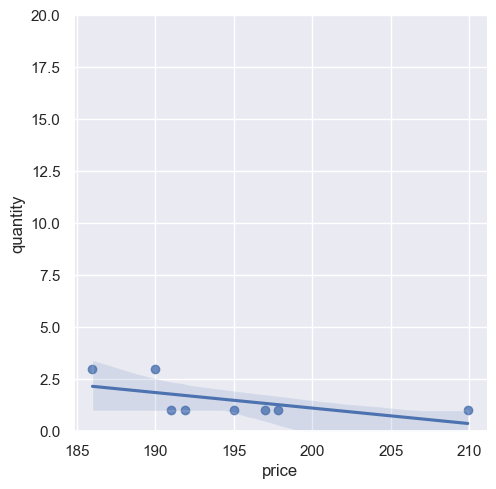

In [97]:
# demand curve
g=sns.lmplot(x = "price", y = "quantity",
data = product_1_test)
g.set(ylim=(0,20))

Negative correlation

**Demand function -->** Used to find connection between demand and price

**profit function -->** total revenue is based on units sold and price. For this project we are assuming the cost as 0

Therefore our revised profit formula:

profit = volume - cost * price

In [104]:
model_demand = LinearRegression()


x = product_1_test['price'] 
y = product_1_test['quantity']

x = product_1_test['price'].to_numpy().reshape(-1, 1)
y = product_1_test['quantity'].to_numpy()

model_demand.fit(x, y)
slope=model_demand.coef_[0]
intercept=model_demand.intercept_


In [105]:
import random

price_ranges = []

for price_point in range(10):
    price_ranges.append(round(random.uniform(min_price-100,max_price+100),2))
price_ranges.sort()

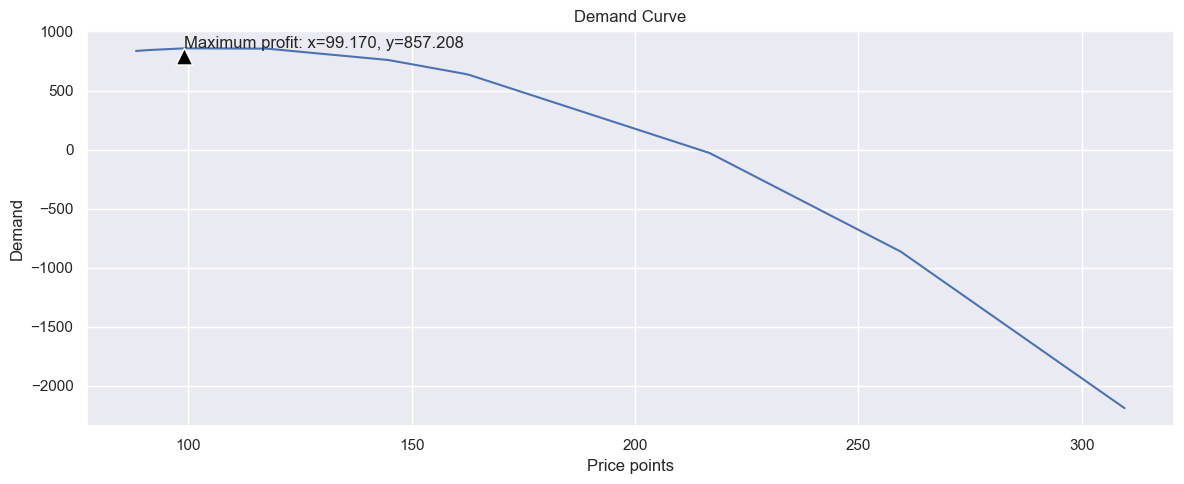

In [106]:
Price = price_ranges
# assuming a fixed cost
cost = 0
Revenue = []
for i in Price:
   quantity_demanded = intercept + slope * i
   
   # profit function
   Revenue.append((i-cost) * quantity_demanded)
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
# plt.plot(profit["Price"], profit["Revenue"])

###$
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.array(profit['Price'])
y = np.array(profit['Revenue'])
line, = ax.plot(x, y)

xmax=x[np.argmax(y)]
ymax=y.max()
# xmax = x[xpos]
text= "Maximum profit: x={:.3f}, y={:.3f}".format(xmax,ymax)
ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax + 5), arrowprops=dict(facecolor='black'),)


plt.xlabel('Price points')
plt.ylabel('Demand')
plt.title('Demand Curve')
plt.grid(True)
  
plt.show()

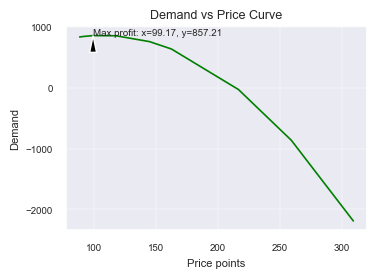

In [111]:
plt.rcParams["figure.figsize"] = [3.93, 2.95]  # 393 px wide, 4:3 aspect ratio
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.array(profit['Price'])
y = np.array(profit['Revenue'])
ax.plot(x, y, linewidth=1.2, color='green')

xmax = x[np.argmax(y)]
ymax = y.max()
text = "Max profit: x={:.2f}, y={:.2f}".format(xmax, ymax)

ax.annotate(
    text,
    xy=(xmax, ymax),
    xytext=(xmax, ymax + 5),
    fontsize=7,                # smaller annotation text
    arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5)
)

plt.xlabel('Price points', fontsize=8)
plt.ylabel('Demand', fontsize=8)
plt.title('Demand vs Price Curve', fontsize=9, pad=6)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, linewidth=0.3)

plt.show()


# Calculating margin percent if we set this new price

In [107]:
revenue_in_2018 = revenue_of_product_2018['price'] * revenue_of_product_2018['units_sold']
revenue_predicted = xmax * ymax
margin_percent = (revenue_predicted - revenue_in_2018)/revenue_in_2018*100
margin_percent

year
2018    3579.148229
dtype: float64